# Treść zadania

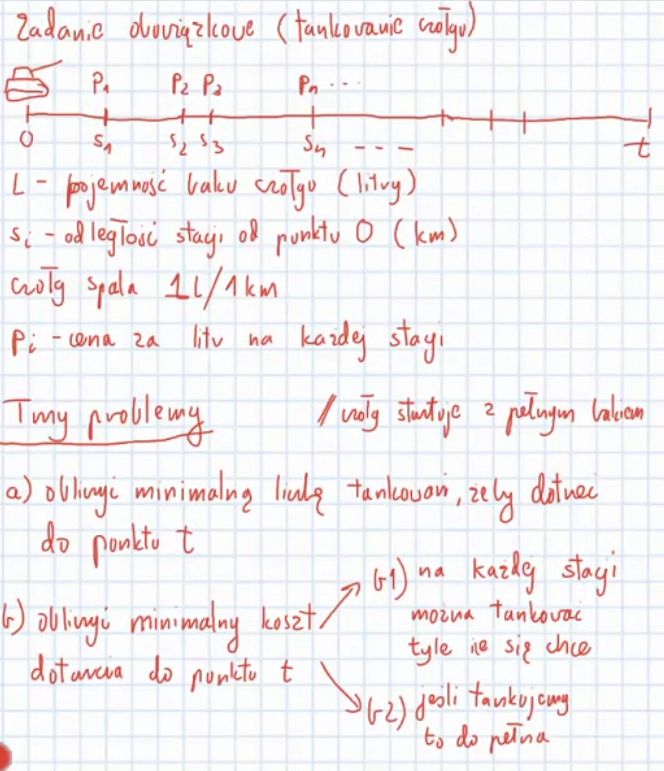

## Podpunkt a)

### Omówienie algorytmu
##### (Zachłanny)

Ponieważ w tym przypadku nie interesuje nas w żaden sposób koszt tankowania oraz to, czy tankujemy do pełna, czy nie, najbardziej opłacalnym rozwiązaniem za każdym razem jest przejechanie maksymalnej odległości, na jaką pozwala zgromadzone w baku paliwo. W ten sposób zminimalizujemy liczbę tankowań, bo zawsze wykorzystamy najwięcej paliwa, ile możemy. Oczywiście za każdym razem tankujemy do pełna, bo tylko wtedy zmaksymalizujemy dystans, jaki możemy przejechać na jednym tankowaniu.
<br><br>
Jeżeli chodzi o sam algorytm, to zdecydowałem się na znajdowanie stacji, przy pomocy wyszukiwania binarnego, przeszukując jedynie ten przedział (podciąg tablicy $ S $), w którym znajdują się odległości stacji, których odległość od punktu startowego jest dalsza niż odległość czołgu od tego punktu, ale nie dalsza niż odległość ostatniej stacji (takiej stacji, na której czołg nigdy nie będzie musiał tankować, bo będzie to indeks stacji, na której czołg musiałby dokonać następnego tankowania, po przebyciu odległości $ t $, gdyby miał jechać dalej). Musimy jeszcze wyznaczyć indeks stacji, na której czołg będzie musiał zatankować po raz pierwszy (chyba, że jest w stanie dotrzeć do celu bez tankowania ani razu, wtedy zwracamy $ 0 $, bo nie jest potrzebne żadne tankowanie). Jest to konieczne, ponieważ najpierw czołg może znajdować się przed jakąkolwiek stacją, a dopiero gdy zatankuje na pierwszej, na której tego tankowania już będzie musiał dokonać (najdalszej, do której uda mu się dotrzeć z punktu początkowego), zacznie poruszać się od stacji do stacji (tzn. zatrzymywać się będzie na tankowanie na kolejnej stacji, na której to tankowanie będzie konieczne). Oczywiście może zaistnieć również sytuacja, w której czołg nie zdąży dotrzeć do stacji, bo w odlełgości, na przebycie której pozwala jego pełen bak, nie znajdzie się żadna stacja. Wówczas zwracamy wartość $ -1 $, która symbolizuje brak możliwości dotarcia do celu.

### Złożoność

###### Obliczeniowa:
$ O(\left \lceil \frac{t}{L} \right \rceil \cdot log(n)) $, gdzie $ n $ - liczba stacji, $ t $ - odległość do punktu docelowego, $ L $ - pojemność baku czołgu
###### Pamięciowa:
$ O(1) $ - zawsze tworzymy niezależną od wejścia liczbę danych

### Implementacja #1
#### Z wyszukiwaniem binarnym
##### (Szybsza, jeżeli mamy dużo stacji i duży bak - tzn. na jednym tankowaniu ominiemy dużą liczbę stacji)

W poniższym algorytmie funkcja nawet nie pobiera tablicy kosztów tankowania na stacjach, bo są one zbędne w rozwiązaniu problemu z podpunktu a).

In [1]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1
            
    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         t: 'distance to the target point'):
    # S.sort()  # Uncomment this line if an array of stations isn't sorted
    # If a tank can reach the target point without refueling, return 0
    if L >= t: return 0
    # Look for the first station to tank on (a tank can start before the first
    # station, and thus, we cannot assume it is placed on the first station)
    first_station_idx = get_station_idx(S, 0, len(S) - 1, L)
    # Search for an index of a station which will be a next station to the
    # last one to consider
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    # In a loop chose the farthest station that the tank can reach
    # and update a position of a tank
    print('last', last_station_idx)
    print(0, '->', 1)
    count = 0
    i = first_station_idx
    while i < last_station_idx:
        next_station_idx = get_station_idx(S, i + 1, last_station_idx, S[i] + L)
        print(i, '->', next_station_idx)
        # If there is no station a tank can reach, return -1
        if i == next_station_idx:
            return -1
        i = next_station_idx
        count += 1
    # Return a final number of refueling stops
    return count if t - S[i] <= L else -1

###### Kilka testów

In [2]:
L = 20
t = 105
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 130, 135]
#       ^  ^               ^           ^   ^   ^                       ^
print(tank(L, S, t))

last 18
0 -> 1
1 -> 2
2 -> 6
6 -> 9
9 -> 10
10 -> 11
11 -> 17
17 -> 18
7


In [3]:
L = 20
t = 133
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140]
#   impossible -------------------------------------------------------------------^----^
print(tank(L, S, t))

last 19
0 -> 1
1 -> 2
2 -> 6
6 -> 9
9 -> 10
10 -> 11
11 -> 17
17 -> 19
-1


In [4]:
L = 20
t = 20
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140]
#   no refueling needed
print(tank(L, S, t))

0


### Implementacja #2
#### Z liniowym poszukiwaniem następnej stacji
##### (Lepsze, jeżeli musimy często tankować, tzn. albo rzadko występują stacje, albo mamy mały bak)

In [5]:
def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         t: 'distance to the target point'):
    # S.sort()  # Uncomment this line if an array of stations isn't sorted
    # If a tank can reach the target point without refueling, return 0
    if L >= t: return 0
    
    n = len(S)
    # Check if we can get to each station on the way
    if L < S[0] or t - S[-1] > L: return -1
    for i in range(1, n):
        if S[i] >= t:
            break
        if S[i] - S[i - 1] > L:
            return -1
    
    # Add a sentinel station if necessary
    if S[-1] < t:
        S.append(float('inf'))
    
    count = 0
    i = 0
    tank_pos = 0
    while i < n + 1:
        # If S[i] is too far to reach, we have to refuel on the S[i - 1] station
        if S[i] - tank_pos > L:  # <--- sentinel station will be useful here
            print(f'{tank_pos} -> {S[i - 1]}')
            count += 1
            tank_pos = S[i - 1]
        if S[i] >= t:
            break
        i += 1
        
    # Remove a sentinel station
    S.pop()
    
    return count if t - tank_pos <= L else -1

###### Kilka testów

In [6]:
L = 20
t = 105
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 130, 135]
#       ^  ^               ^           ^   ^   ^                       ^
print(tank(L, S, t))

0 -> 9
9 -> 21
21 -> 41
41 -> 58
58 -> 62
62 -> 80
80 -> 100
7


In [7]:
L = 20
t = 133
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140, 160, 190]
#   impossible -------------------------------------------------------------------^----^
print(tank(L, S, t))

0 -> 9
9 -> 21
21 -> 41
41 -> 58
58 -> 62
62 -> 80
80 -> 100
100 -> 112
-1


In [8]:
L = 20
t = 20
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140]
#   no tanking
print(tank(L, S, t))

0


In [9]:
L = 5
t = 21
S = [0, 2, 3, 5, 8, 11, 13, 17]
print(tank(L, S, t))

0 -> 5
5 -> 8
8 -> 13
13 -> 17
4


### (Dodatkowo) Zwracanie indeksów stacji, na których odbyło się tankowanie

In [10]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1

    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         t: 'distance to the target point'):
    # S.sort()  # Uncomment this line if an array of stations isn't sorted
    # Look for the first station to tank on (a tank can start before the first
    # station, and thus, we cannot assume it is placed on the first station)
    first_station_idx = get_station_idx(S, 0, len(S) - 1, L)
    # If a tank will have to refuel after the target point, no refueling is
    # required
    if L >= t: return 0, []
    # Search for an index of a station which will be a next station to the
    # lest one to consider
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    # In a loop chose the farthest station that the tank can reach
    # and update a position of a tank
    count = 0
    i = first_station_idx
    stations = []
    while i < last_station_idx:
        stations.append(i)
        next_station_idx = get_station_idx(S, i, last_station_idx, S[i] + L)
        # If there is no station a tank can reach, return -1
        if i == next_station_idx:
            return -1, []
        i = next_station_idx
        count += 1
    # Return a final number of refueling
    return (count, stations) if t - S[last_station_idx] <= L else (-1, [])

###### Kilka testów

In [11]:
L = 20
t = 105
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 130, 135]
#       ^  ^               ^           ^   ^   ^                       ^
print(tank(L, S, t))

(7, [1, 2, 6, 9, 10, 11, 17])


In [12]:
L = 20
t = 138
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140]
#   impossible -------------------------------------------------------------------^----^
print(tank(L, S, t))

(-1, [])


In [13]:
L = 20
t = 20
#    0, 1, 2,  3,  4,  5,  6,  7,  8,  9,  10, 11, 12, 13, 14, 15, 16, 17,  18,  19,  20,  21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 90, 92, 97, 98, 100, 105, 112, 135, 140]
#   no tanking
print(tank(L, S, t))

(0, [])


## Podpunkt b1)

### Omówienie algorytmu
##### (Zachłanny)

##### Omówienie koncepcji:

Zauważmy, że podróż najlepiej podzielić jest na 3 etapy: <br>
1. Początkowy - dotarcie do stacji, na której będziemy po raz pierwszy tankować (nie musi być to koniecznie pierwsza stacja), <br>
2. Przemieszczanie się pomiędzy stacjami paliw (tak najłatwiej jest opisać ruch czołgu, ponieważ nas nie obchodzą chwile, w których znajduje się on pomiędzy stacjami, a jedynie to, gdzie się on zatrzymuje, aby zatankować), <br>
3. Zatankowanie ostatni raz i wyruszenie do celu (nie musimy tankować na ostatniej stacji, jaka znajduje się przed punktem docelowym, ostatnie tankowanie może mieć miejsce wcześniej; tankujemy tylko tyle, ile trzeba, aby najlepiej "na pustym baku" dojechać do celu).

###### 1. Etap:
Ponieważ czołg startuje z pełnym bakiem, musimy w odległości maksymalnie $ L $ kilometrów od punktu startowego (gdzie $ L $ jest pojemnością baku czołgu) wybrać pierwszą stację, na której czołg będzie tankował. Oczywiście, jeżeli w odległości $ L $ nie ma żadnej stacji, od razu możemy zwrócić np. $ -1 $, co oznacza brak możliwości dotarcia do celu. Na tym etapie podróży wybieramy taką stację, na której paliwo jest najtańsze. Możemy tak postąpić, bo nawet, jeżeli tuż za odległością $ L $ kilometrów od punktu startowego znajdzie się tańsza stacja, na pierwszej stacji zatankujemy tylko tyle, ile trzeba będzie, aby dotrzeć do tańszej stacji. Tankować i tak będziemy musieli na wybranej stacji, bo zawsze jest to najbardziej opłacalna stacja w promieniu $ L $ kilometrów od punktu startowego, więc lepszej nie znajdziemy, a jeżeli nie zatankujemy na tym etapie podróży, nie pojedziemy dalej niż na dystans $ L $ kilometrów.

###### 2. Etap:
Ten etap odpowiada głównej części algorytmu i jest najbardziej skomplikowany. Warto zauważyć, że skoro mamy wpływ zarówno na to, ile chcemy zatankować (mamy jedynie górny limit, wynoszący $ L $, ale możemy np. dolać jedynie kilka litrów paliwa) jak i na to, gdzie tankujemy, możemy zaobserwować, że dla każdej stacji musimy podjąć decyzję, zgodnie z poniższymi krokami:
- "Skanujemy" wszystkie stacje w odległości maksymalnie $ L $ od bieżącej stacji (oczywiście nie cofamy się, więc rozpatrujemy jedynie stacje, które położone są dalej niż ta, na której znajduje się obecnie czołg, tzn. $ S[i] < S[j] \le S[i] + L $, gdzie $ i $ - indeks stacji, na której znajduje się teraz czołg, $ j $ - indeks sprawdzanej stacji),
- Jeżeli znajdziemy stację, na której paliwo jest tańsze niż na obecnej (najbliższą taką stację), to stacja ta staje się naszym punktem docelowym. W takiej sytuacji tankujemy tylko tyle na bieżącej stacji (która notabene była i tak możliwie najlepiej wybraną w danym momencie stacją), ile musimy zatankować, aby dotrzeć do następnej (tańszej) stacji na "pustym baku". Ponieważ chcemy zminimalizować koszty, zawsze, jeżeli widzimy okazję, by przyoszczędzić na którejś z następnych stacji, chcemy zatankować jak najmniej na tej, na której jesteśmy obecnie, czyli tej, która była najtańsza na poprzednim odcinku drogi,
- Jeżeli wśród stacji, które są w naszym zasięgu, nie ma żadnej stacji, na której paliwo jest tańsze niż na obecnej, wybieramy spośród stacji, do których możemy dotrzeć, taką stację, na której zatankujemy za najniższą cenę (która mimo wszystko będzie wyższa od ceny na bieżącej stacji). Z tego też powodu, na stacji, na której znajdujemy się teraz, tankujemy tyle, ile jesteśmy w stanie (do pełna), aby później zatankować jak najmniej na droższych stacjach.

###### 3. Etap:
Tak naprawdę w kodzie etap 3. i 2. są połączone (odpowiada za nie jedna pętla i jedna funkcja, znajdująca stacje). Etap ten wiąże się z dotarciem do celu i musimy przyjąć dla niego nieco inną strategię. Nie możemy już sprawdzać wszystkich stacji, do których nasz bak nam pozwala dojechać ani też szukać stacji najtańszej wśród następnych stacji po drodze do celu, jeżeli każda z nich jest droższa od bieżącej, bo bardziej opłaca nam się od razu wyruszyć do celu ze stacji, na której się obecnie znajdujemy, uprzednio tankując tylko tyle, ile jest konieczne, aby dotrzeć do punktu docelowego, mając pusty bak (napełniamy bak paliwem do takiego poziomu, jaki jest konieczny, aby całe paliwo zużyć na ostatnim etapie podróży i żebyśmy po dotarciu do celu nie mieli już wcale paliwa w baku). Zatem wyszczególnijmy zasady postępowania (oczywiście poniższe zasady zaczynają obowiązywać zamiast opisanych wyżej zasad od momentu, w którym nasz zasięg pozwala na dotarcie do celu, czyli $ S[i] + L \ge t $, gdzie $ t $ - odległość od punktu początkowego do punktu docelowego, $ S[i] $ - odległość czołgu (bieżącej stacji) od punktu początkowego):
- Jeżeli między bieżącą stacją a punktem docelowym (który może leżeć na stacji lub między stacjami) znajdują się jeszcze jakieś stacje i znadziemy taką stację, na której koszt paliwa jest niższy niż obecny, tankujemy tylko tyle, ile potrzeba, aby dotrzeć do znalezionej (tańszej) stacji,
- Jeżeli wśród pozostałych na drodze do celu stacji najtańsza stacja, jaką znajdziemy, będzie droższa niż bieżąca stacja LUB nie ma więcej stacji na drodze do celu (tzn. następna stacja znajduje się tam, gdzie cel lub dalej albo nie ma już więcej stacji), jedziemy bezpośrednio do celu, tankując uprzednio na bieżącej stacji tylko tyle, ile trzeba, by dotrzeć do celu.

##### Analiza kodu:

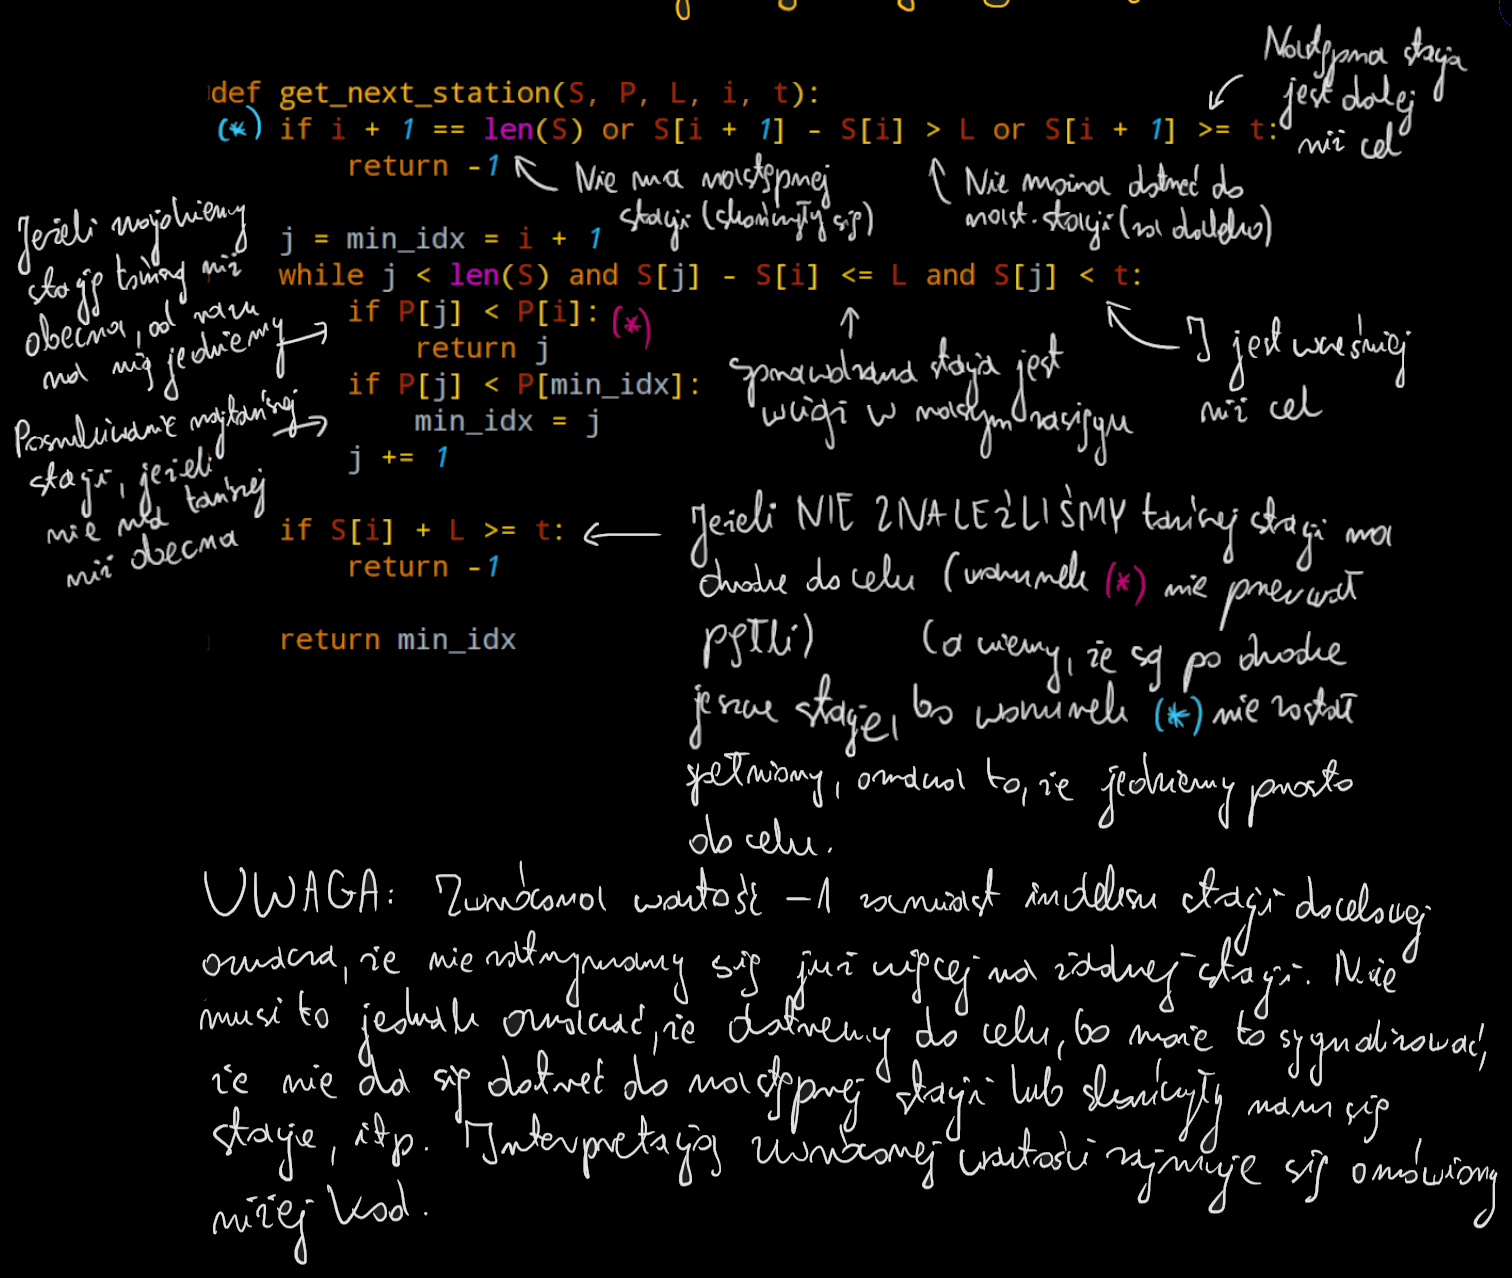

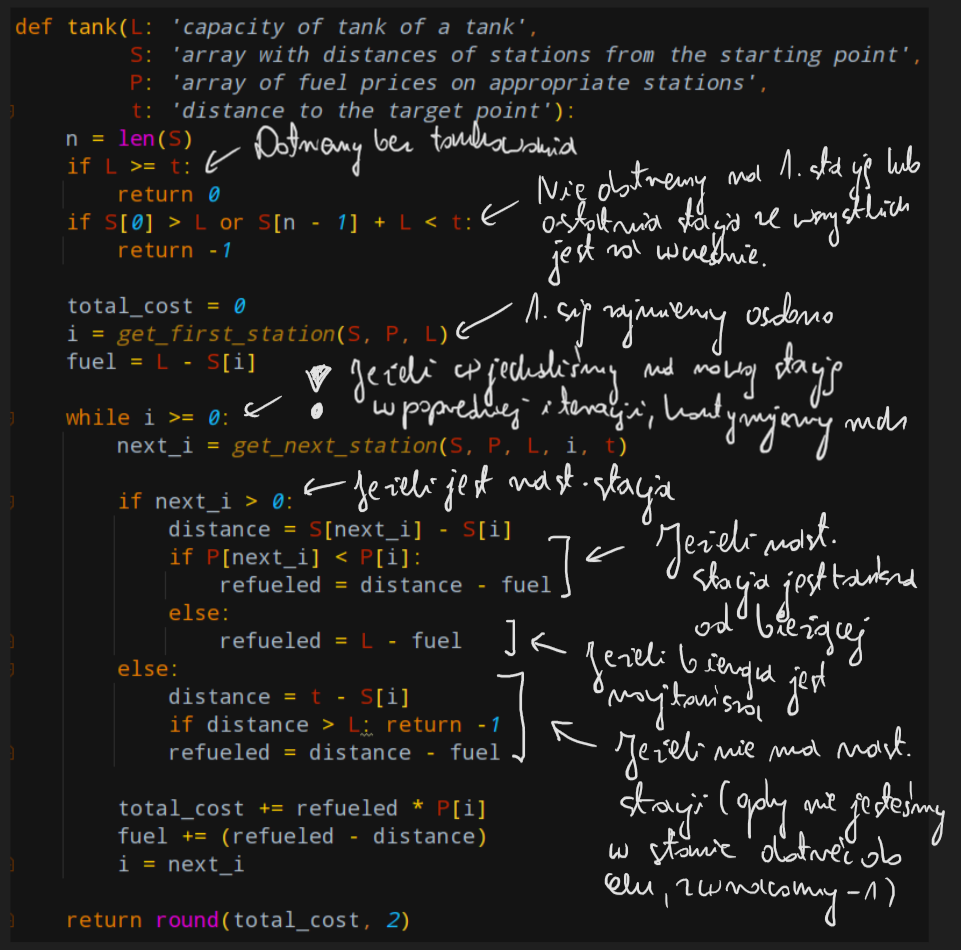

### Złożoność

###### Obliczeniowa:
Zazwyczaj około: <br>
$ O(n) $, gdzie $ n $ - liczba stacji <br>
W najgorszym przypadku: <br>
$ O(n^2) $, gdzie $ n $ - liczba stacji (jeżeli każda następna stacja jest droższa od poprzedniej, a pojemność naszego baku jest taka, że nie dotrzemy od razu do celu oraz zawsze będziemy sprawdzać dużą liczbę następnych stacji)
###### Pamięciowa:
$ O(1) $ - zawsze tworzymy niezależną od wejścia liczbę danych

### Analiza działania na podstawie przykładu

Poniższy przykład dotyczy danych wejściowych:

    L = 20
    t = 126
    S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
    P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]

### Implementacja

###### UWAGA:
Zakładam, że otrzymane na wejściu tablice, zawierają odpowiadają posortowanym według dystansu od punktu początkowego (niemalejąco) stacji i odpowiednich kosztów tankowania na tych stacjach.

In [14]:
def get_first_station(S, P, L):
    min_idx = 0
    for i in range(1, len(S)):
        if S[i] > L: break
        if P[i] < P[min_idx]:
            min_idx = i
    return min_idx


def get_next_station(S, P, L, i, t):
    if i + 1 == len(S) or S[i + 1] - S[i] > L or S[i + 1] >= t:
        return -1
    
    j = min_idx = i + 1
    while j < len(S) and S[j] - S[i] <= L and S[j] < t:
        if P[j] < P[i]:
            return j
        if P[j] < P[min_idx]:
            min_idx = j
        j += 1
    
    if S[i] + L >= t:
        return -1
    
    return min_idx


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    n = len(S)
    if L >= t:
        return 0
    if S[0] > L or S[n - 1] + L < t:
        return -1

    total_cost = 0
    i = get_first_station(S, P, L)
    fuel = L - S[i]

    while i >= 0:
        next_i = get_next_station(S, P, L, i, t)
#         print(f"{i} -> {next_i}")

        if next_i > 0:
            distance = S[next_i] - S[i]
            if P[next_i] < P[i]:
                refueled = distance - fuel
            else:
                refueled = L - fuel
        else:
            distance = t - S[i]
            if distance > L: return -1
            refueled = distance - fuel

        total_cost += refueled * P[i]
        fuel += (refueled - distance)
        i = next_i
        
    return round(total_cost, 2)

###### Kilka testów

In [15]:
L = 20
t = 125
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
print(tank(L, S, P, t))

388.0


In [16]:
L = 20
t = 126
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
print(tank(L, S, P, t))

398.2


In [17]:
L = 20
t = 125
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
print(tank(L, S, P, t))

374.8


In [18]:
L = 20
t = 132
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
print(tank(L, S, P, t))

459.4


In [19]:
L = 20
t = 133
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
print(tank(L, S, P, t))

-1


In [20]:
L = 20
t = 132
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2]
print(tank(L, S, P, t))

-1


In [21]:
L = 20
t = 30
S = [0,  1,   21, 22,  24, 25]
P = [10, 1.2, 5,  5.5, 5.1, 5]
print(tank(L, S, P, t))

46.2


### (Dodatkowo) Kolejno odwiedzane stacje oraz ilość zatankowanego paliwa

In [22]:
def get_first_station(S, P, L):
    min_idx = 0
    for i in range(1, len(S)):
        if S[i] > L: break
        if P[i] < P[min_idx]:
            min_idx = i
    return min_idx


def get_next_station(S, P, L, i, t):
    if i + 1 == len(S) or S[i + 1] - S[i] > L or S[i + 1] >= t:
        return -1
    
    j = min_idx = i + 1
    while j < len(S) and S[j] - S[i] <= L and S[j] < t:
        if P[j] < P[i]:
            return j
        if P[j] < P[min_idx]:
            min_idx = j
        j += 1
    
    if S[i] + L >= t:
        return -1
    
    return min_idx


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    n = len(S)
    if L >= t: 
        return 0, []
    if S[0] > L or S[n - 1] + L < t: 
        return -1, []
    
    total_cost = 0
    i = get_first_station(S, P, L)
    fuel = L - S[i]
    stations = []
    
    while i >= 0:
        next_i = get_next_station(S, P, L, i, t)
        
        if next_i > 0:
            distance = S[next_i] - S[i]
            if P[next_i] < P[i]:
                refueled = distance - fuel
            else:
                refueled = L - fuel
        else:
            distance = t - S[i]
            if distance > L: return -1, []
            refueled = distance - fuel
                
        total_cost += refueled * P[i]
        fuel += (refueled - distance)
        stations.append((i, refueled))
        i = next_i
        
    return round(total_cost, 2), stations

###### Kilka testów

In [23]:
def test(L, S, P, t):
    cost, stations = tank(L, S, P, t)
    if cost >= 0:
        print(f'Total cost: ${cost}')
        print('Visited stations:')
        print(' -> '.join(str(v[0] + 1) for v in stations))
        print('Refueling history:')
        total = 0
        for i, refueled in stations:
            total += refueled * P[i]
            print(f'{f"[{i + 1}]".ljust(len(str(stations[-1][0]))+2)} Refueled: {str(refueled).ljust(len(str(L)))} liters   Price: ${P[i]:<4}   Refueling cost: ${P[i] * refueled:.2f}')
        print('Is total cost correct?', round(total, 2) == cost)
    else:
        print('Cannot reach the target point.')

In [24]:
L = 20
t = 126
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5 , .2 ]
test(L, S, P, t)

Total cost: $398.2
Visited stations:
1 -> 2 -> 3 -> 4 -> 5 -> 9 -> 11 -> 12 -> 14 -> 18 -> 19
Refueling history:
[1]  Refueled: 1  liters   Price: $1.3    Refueling cost: $1.30
[2]  Refueled: 8  liters   Price: $3.2    Refueling cost: $25.60
[3]  Refueled: 1  liters   Price: $8.3    Refueling cost: $8.30
[4]  Refueled: 5  liters   Price: $8.1    Refueling cost: $40.50
[5]  Refueled: 20 liters   Price: $3.3    Refueling cost: $66.00
[9]  Refueled: 15 liters   Price: $3.8    Refueling cost: $57.00
[11] Refueled: 10 liters   Price: $8.2    Refueling cost: $82.00
[12] Refueled: 12 liters   Price: $3.8    Refueling cost: $45.60
[14] Refueled: 13 liters   Price: $2.9    Refueling cost: $37.70
[18] Refueled: 20 liters   Price: $1.2    Refueling cost: $24.00
[19] Refueled: 1  liters   Price: $10.2   Refueling cost: $10.20
Is total cost correct? True


In [25]:
L = 20
t = 125
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
test(L, S, P, t)

Total cost: $374.8
Visited stations:
1 -> 2 -> 3 -> 4 -> 5 -> 9 -> 11 -> 12 -> 14 -> 18 -> 20
Refueling history:
[1]  Refueled: 1  liters   Price: $1.3    Refueling cost: $1.30
[2]  Refueled: 8  liters   Price: $3.2    Refueling cost: $25.60
[3]  Refueled: 1  liters   Price: $8.3    Refueling cost: $8.30
[4]  Refueled: 5  liters   Price: $8.1    Refueling cost: $40.50
[5]  Refueled: 20 liters   Price: $3.3    Refueling cost: $66.00
[9]  Refueled: 15 liters   Price: $3.8    Refueling cost: $57.00
[11] Refueled: 10 liters   Price: $8.2    Refueling cost: $82.00
[12] Refueled: 12 liters   Price: $3.8    Refueling cost: $45.60
[14] Refueled: 13 liters   Price: $2.9    Refueling cost: $37.70
[18] Refueled: 8  liters   Price: $1.2    Refueling cost: $9.60
[20] Refueled: 12 liters   Price: $0.1    Refueling cost: $1.20
Is total cost correct? True


In [26]:
L = 20
t = 133
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
test(L, S, P, t)

Total cost: $375.6
Visited stations:
1 -> 2 -> 3 -> 4 -> 5 -> 9 -> 11 -> 12 -> 14 -> 18 -> 20
Refueling history:
[1]  Refueled: 1  liters   Price: $1.3    Refueling cost: $1.30
[2]  Refueled: 8  liters   Price: $3.2    Refueling cost: $25.60
[3]  Refueled: 1  liters   Price: $8.3    Refueling cost: $8.30
[4]  Refueled: 5  liters   Price: $8.1    Refueling cost: $40.50
[5]  Refueled: 20 liters   Price: $3.3    Refueling cost: $66.00
[9]  Refueled: 15 liters   Price: $3.8    Refueling cost: $57.00
[11] Refueled: 10 liters   Price: $8.2    Refueling cost: $82.00
[12] Refueled: 12 liters   Price: $3.8    Refueling cost: $45.60
[14] Refueled: 13 liters   Price: $2.9    Refueling cost: $37.70
[18] Refueled: 8  liters   Price: $1.2    Refueling cost: $9.60
[20] Refueled: 20 liters   Price: $0.1    Refueling cost: $2.00
Is total cost correct? True


In [27]:
L = 20
t = 134
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
test(L, S, P, t)

Cannot reach the target point.


In [28]:
L = 14
S = [1, 9, 15, 16, 17, 27, 28]
P = [1, 100, 10, 15, 1, 30, 30]
t = 30

test(L, S, P, t)

Total cost: $34
Visited stations:
1 -> 3 -> 5
Refueling history:
[1] Refueled: 1  liters   Price: $1      Refueling cost: $1.00
[3] Refueled: 2  liters   Price: $10     Refueling cost: $20.00
[5] Refueled: 13 liters   Price: $1      Refueling cost: $13.00
Is total cost correct? True


In [29]:
L = 10
S = [8, 11, 15, 16]
P = [40, 7, 15, 12]
t = 23

test(L, S, P, t)

Total cost: $134
Visited stations:
1 -> 2 -> 4
Refueling history:
[1] Refueled: 1  liters   Price: $40     Refueling cost: $40.00
[2] Refueled: 10 liters   Price: $7      Refueling cost: $70.00
[4] Refueled: 2  liters   Price: $12     Refueling cost: $24.00
Is total cost correct? True


## Podpunkt b2)

### Omówienie algorytmu
##### (Dynamiczny)

Funkcja, opisująca zależność: <br>
$ f(i) $ - minimalny koszt dotacia do stacji $ i $ + koszt tankowania do pełna na stacji o indeksie $ i $.
<be><br>
Aby otrzymać rezultat, mając tak zdefiniowaną funkcję, musimy znaleźć taką stację, z której jesteśmy w stanie dotrzeć do celu (po zatankowaniu do pełna, bo zawsze tankujemy do pełna) i jednocześnie całkowity koszt podróży będzie najmniejszy. Nie musi być to ostatnia stacja przed punktem docelowym, zatem konieczne jest wyznaczenie najmniejszych kosztów dotarcia do każdej ze stacji (+ tankowania na tej stacji tyle, ile trzeba, by dotrzeć do celu), jakie znajdują się w odległości nie mniejszej niż $ L $ kilometrów przed celem $ t $. Możemy zauważyć, że minimalny koszt dotarcia do pewnej stacji $ i $ (+ tankowania na niej do pełna) jest równy minimalnemu kosztowi dotarcia do pewnej stacji $ j $ takiej, że $ j \lt i $ oraz $ S[i] - S[j] <= L $ (która jest w naszym zasięgu) (+ koszt tankowania na stacji $ j $ do pełna) powiększonemu o koszt tankowania do pełna na stacji $ i $. Ponieważ koszt tankowania na stacji $ i $ będzie zależał nie tylko od tego, jaki był koszt tankowania na stacji $ j $ (i, czy ta stacja była najbardziej opłacalna), ale również od kosztu tankowania na stacji $ i $ i dystansu między stacjami $ j $ a $ i $, który przełoży się na liczbę litrów paliwa, które trzeba będzie zatankować na stacji $ i $, muismy rozważyć wszystkie możliwe poprzednie stacje, jakie mamy w zasięgu i zapisać najniższy koszt w tablicy, w której spamiętujemy wyniki.
<br><br>
Ponieważ zapamiętujemy obliczone wartości, wszystkie pola tablicy pomocniczej $ F $ zostaną wypełnione poczas pierwszej iteracji (lub pierwszego wywołania rekurencji w podejściu Top-down), a w kolejnych itaracjach przez możliwe ostatnie stacje, będziemy jedynie odczytywać zapisane wartości w tej tablicy.

### Złożoność

###### Obliczeniowa:
Zazwyczaj około: <br>
$ O(n^2) $, gdzie $ n $ - liczba stacji (zazwyczaj mniej - podobnie jak w powyższym algorytmie, bo sprawdzamy tylko tyle poprzednich stacji, do ilu jesteśmy w stanie dotrzeć) <br>
###### Pamięciowa:
$ O(n) $

### Implementacja
#### Top-down

###### UWAGA:
Zakładam, że otrzymane na wejściu tablice, zawierają odpowiadają posortowanym według dystansu od punktu początkowego (niemalejąco) stacji i odpowiednich kosztów tankowania na tych stacjach.

In [30]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1

    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    if L >= t: 
        return 0
    if S[0] > L: 
        return -1
    
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    inf = float('inf')
    
    F = [inf] * (last_station_idx + 1)
    
    counter = 0
    
    def recur(i):
#         nonlocal counter
#         counter += 1
#         print(counter, i, F)
        if F[i] == inf:
            min_cost = inf
            j = i - 1
            while j >= 0 and S[i] - S[j] <= L:
                min_cost = min(min_cost, recur(j) + (S[i] - S[j]) * P[i])
                j -= 1
            if S[i] <= L:
                min_cost = min(min_cost, S[i] * P[i])
            F[i] = min_cost
        return F[i]
    
    min_cost = inf
    i = last_station_idx
    while t - S[i] <= L:
#         print('Checking', i, S[i])
        min_cost = min(min_cost, recur(i))
        i -= 1
    return min_cost

###### Kilka testów

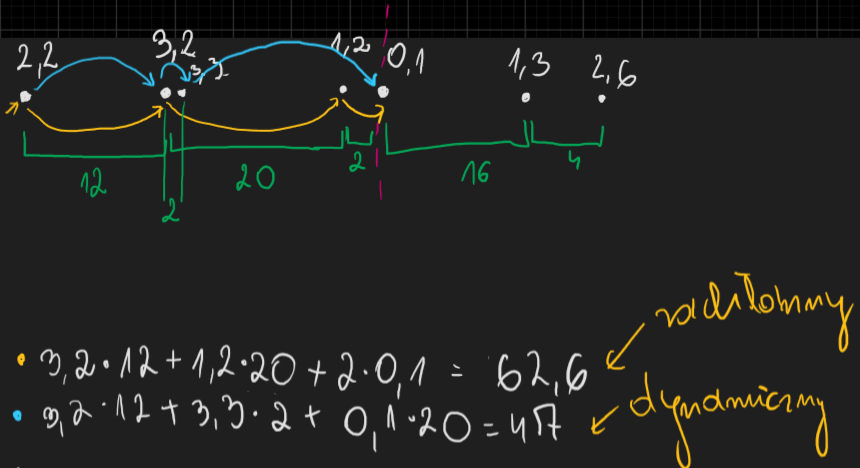

In [31]:
L = 20
t = 38
S = [0, 12, 14, 32, 34, 50, 54]
P = [2.2, 3.2, 3.3, 1.2, .1, 1.3, 2.6]
tank(L, S, P, t)

47.00000000000001

In [32]:
L = 20
t = 38
S = [0, 12, 14, 32, 34, 36, 50, 54]
P = [2.2, 3.2, 3.3, 1.2, .1, 10, 1.3, 2.6]
tank(L, S, P, t)

47.00000000000001

In [33]:
L = 20
t = 133
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
tank(L, S, P, t)

447.3

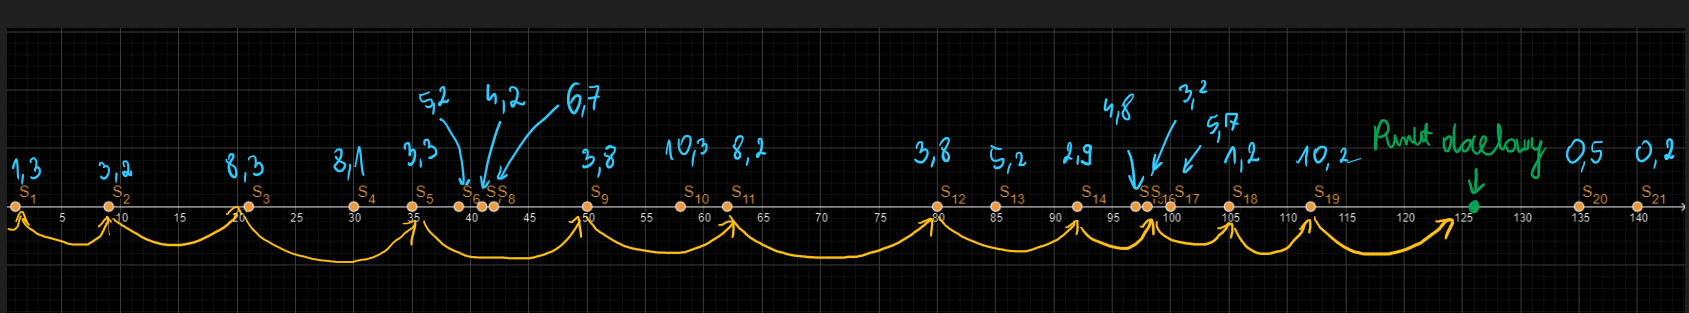

In [34]:
L = 20
t = 126
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
tank(L, S, P, t)

517.9

### (Dodatkowo) Otrzymywanie rozwiązania

In [35]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1

    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    if L >= t: 
        return 0
    if S[0] > L: 
        return -1
    
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    inf = float('inf')
    
    F = [inf] * (last_station_idx + 1)
    
    def recur(i):
        if F[i] == inf:
            min_cost = inf
            j = i - 1
            while j >= 0 and S[i] - S[j] <= L:
                min_cost = min(min_cost, recur(j) + (S[i] - S[j]) * P[i])
                j -= 1
            if S[i] <= L:
                min_cost = min(min_cost, S[i] * P[i])
            F[i] = min_cost
        return F[i]
    
    min_cost = inf
    i = last_station_idx
    min_idx = i
    while t - S[i] <= L:
        cost = recur(i)
        if cost < min_cost:
            min_cost = cost
            min_idx = i
        i -= 1
    return min_cost, F, min_idx


def get_solution(S, P, F, i):
    res = []
    
    for j in range(i - 1, -1, -1):
        if F[j] < F[i]:
            res.append((i, S[i] - S[j], F[i] - F[j], P[i]))
            i = j
            
    res.append((i, S[i], F[i], P[i]))
    res.reverse()
    return res

###### Kilka testów

In [36]:
# L = 20
t = 38
S = [.5,  1  , 12 , 14 , 32 , 34, 36, 50 , 54 ]
P = [120, 2.2, 3.2, 3.3, 1.2, .1, 10, 1.3, 2.6]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[60.0, 2.2, 37.400000000000006, 44.00000000000001, 61.400000000000006, 46.00000000000001, 66.0]

Total cost: $46.00
Refueled 1  liters on station 1   Total cost: $2.2    ($2.2 per liter)
Refueled 11 liters on station 2   Total cost: $35.2   ($3.2 per liter)
Refueled 2  liters on station 3   Total cost: $6.6    ($3.3 per liter)
Refueled 20 liters on station 5   Total cost: $2.0    ($0.1 per liter)


In [37]:
L = 20
t = 125
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[1.3, 26.900000000000002, 126.50000000000001, 199.4, 172.70000000000002, 193.50000000000003, 197.90000000000003, 204.60000000000002, 229.70000000000002, 312.1, 328.1, 396.5, 422.5, 431.3, 455.3, 450.5, 461.9, 446.5, 517.9]

Total cost: $446.50
Refueled 1  liters on station 0   Total cost: $1.3    ($1.3 per liter)
Refueled 8  liters on station 1   Total cost: $25.6   ($3.2 per liter)
Refueled 12 liters on station 2   Total cost: $99.6   ($8.3 per liter)
Refueled 14 liters on station 4   Total cost: $46.2   ($3.3 per liter)
Refueled 4  liters on station 5   Total cost: $20.8   ($5.2 per liter)
Refueled 2  liters on station 6   Total cost: $4.4    ($4.2 per liter)
Refueled 1  liters on station 7   Total cost: $6.7    ($6.7 per liter)
Refueled 8  liters on station 8   Total cost: $25.1   ($3.8 per liter)
Refueled 8  liters on station 9   Total cost: $82.4   ($10.3 per liter)
Refueled 4  liters on station 10  Total cost: $16.0   ($8.2 per liter)
Refueled 18 liters on station 11  Total cost:

In [38]:
L = 20
t = 126
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[1.3, 26.900000000000002, 126.50000000000001, 199.4, 172.70000000000002, 193.50000000000003, 197.90000000000003, 204.60000000000002, 229.70000000000002, 312.1, 328.1, 396.5, 422.5, 431.3, 455.3, 450.5, 461.9, 446.5, 517.9]

Total cost: $517.90
Refueled 1  liters on station 0   Total cost: $1.3    ($1.3 per liter)
Refueled 8  liters on station 1   Total cost: $25.6   ($3.2 per liter)
Refueled 12 liters on station 2   Total cost: $99.6   ($8.3 per liter)
Refueled 14 liters on station 4   Total cost: $46.2   ($3.3 per liter)
Refueled 4  liters on station 5   Total cost: $20.8   ($5.2 per liter)
Refueled 2  liters on station 6   Total cost: $4.4    ($4.2 per liter)
Refueled 1  liters on station 7   Total cost: $6.7    ($6.7 per liter)
Refueled 8  liters on station 8   Total cost: $25.1   ($3.8 per liter)
Refueled 8  liters on station 9   Total cost: $82.4   ($10.3 per liter)
Refueled 4  liters on station 10  Total cost: $16.0   ($8.2 per liter)
Refueled 18 liters on station 11  Total cost:

### Implementacja
#### Bottom-up

In [39]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1

    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    if L >= t: 
        return 0
    if S[0] > L: 
        return -1
    
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    n = last_station_idx + 1
    
    inf = float('inf')
    F = [inf] * n
    # Store a cost required to fill up a tank on the first station
    F[0] = P[0] * S[0]
    
    for i in range(1, n):
        j = i - 1
        while j >= 0 and S[i] - S[j] <= L:
            F[i] = min(F[i], F[j] + (S[i] - S[j]) * P[i])
            j -= 1
        if S[i] <= L:
            F[i] = min(F[i], S[i] * P[i])
            
    # Get the last station (the one of the lowest total cost)
    min_cost = inf
    i = last_station_idx
    while i >= 0 and t - S[i] <= L:
        min_cost = min(min_cost, F[i])
        i -= 1
            
#     print(F)
    return min_cost

###### Kilka testów

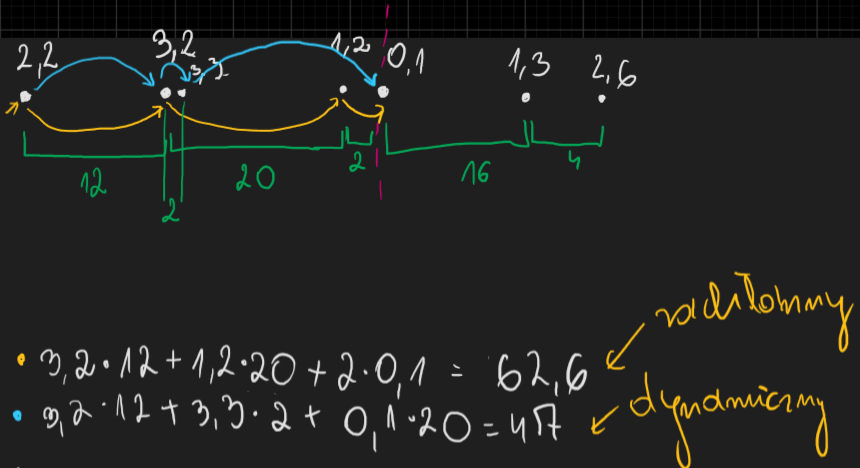

In [40]:
L = 20
t = 38
S = [0, 12, 14, 32, 34, 50, 54]
P = [2.2, 3.2, 3.3, 1.2, .1, 1.3, 2.6]
tank(L, S, P, t)

47.00000000000001

In [41]:
L = 20
t = 38
S = [0, 12, 14, 32, 34, 36, 50, 54]
P = [2.2, 3.2, 3.3, 1.2, .1, 10, 1.3, 2.6]
tank(L, S, P, t)

47.00000000000001

In [42]:
L = 20
t = 133
#    1    2    3    4    5    6    7    8    9    10    11   12   13   14   15   16   17   18   19    20   21   22
S = [1  , 9  , 21 , 30 , 35 , 39 , 41 , 42 , 50 , 58  , 62 , 80 , 85 , 92 , 97 , 98 , 100, 105, 112 , 113, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .1 , .5 , .2 ]
tank(L, S, P, t)

447.3

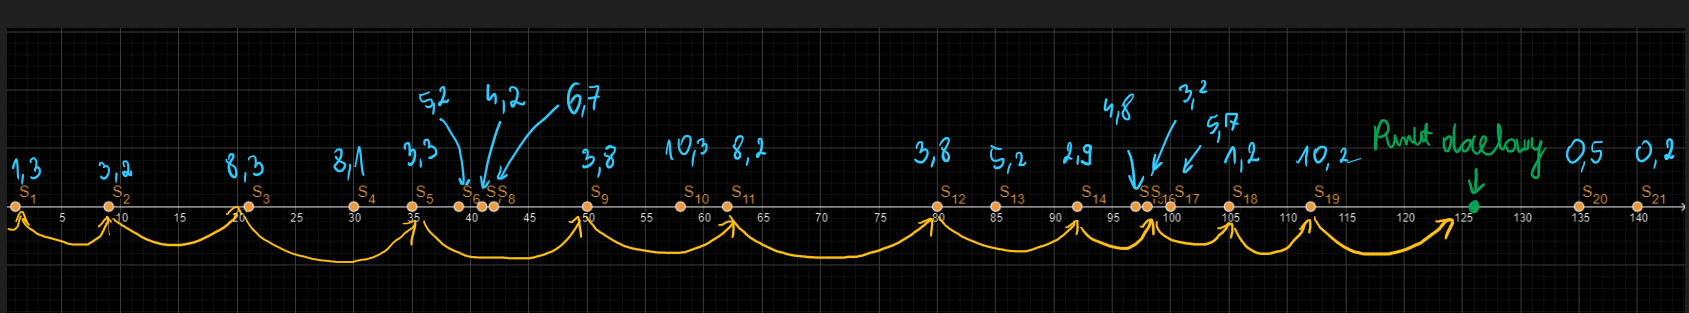

In [43]:
L = 20
t = 126
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]
tank(L, S, P, t)

517.9

In [44]:
L = 14
S = [1, 9, 15, 16, 17, 27, 28]
P = [1, 100, 10, 15, 1, 30, 30]
t = 30

tank(L, S, P, t)

143

### (Dodatkowo) Otrzymywanie rozwiązania

Algorytm taki sam, jak w przypadku podejścia Top-down.

In [45]:
# Use a modified Binary Search algorithm to find the next station
def get_station_idx(S: 'array with distances of stations from the starting point',
                    l: 'begin index of a subarray', 
                    r: 'end index of a subarray', 
                    R: 'the most distant point a tank can reach'):
    while l <= r:
        mid = (l + r) // 2
        if R < S[mid]:
            r = mid - 1
        else:
            l = mid + 1

    return r


def tank(L: 'capacity of tank of a tank',
         S: 'array with distances of stations from the starting point',
         P: 'array of fuel prices on appropriate stations',
         t: 'distance to the target point'):
    if L >= t: 
        return 0
    if S[0] > L: 
        return -1
    
    last_station_idx = get_station_idx(S, 0, len(S) - 1, t)
    n = last_station_idx + 1
    
    F = [float('inf')] * n
    # Store a cost required to fill up a tank on the first station
    F[0] = P[0] * S[0]
    
    for i in range(1, n):
        j = i - 1
        while j >= 0 and S[i] - S[j] <= L:
            F[i] = min(F[i], F[j] + (S[i] - S[j]) * P[i])
            j -= 1
        if S[i] <= L:
            F[i] = min(F[i], S[i] * P[i])
            
    # Get the last station (the one of the lowest total cost)
    min_idx = last_station_idx
    i = min_idx - 1
    while i >= 0 and t - S[i] <= L:
        if F[i] < F[min_idx]:
            min_idx = i
        i -= 1
            
#     print(F)
    return F[min_idx], F, min_idx


def get_solution(S, P, F, i):
    res = []
    
    for j in range(i - 1, -1, -1):
        if F[j] < F[i]:
            res.append((i, S[i] - S[j], F[i] - F[j], P[i]))
            i = j
            
    res.append((i, S[i], F[i], P[i]))
            
    return res[::-1]

###### Kilka testów

In [46]:
L = 20
t = 38
S = [.5,  1  , 12 , 14 , 32 , 34, 36, 50 , 54 ]
P = [120, 2.2, 3.2, 3.3, 1.2, .1, 10, 1.3, 2.6]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[60.0, 2.2, 37.400000000000006, 44.00000000000001, 61.400000000000006, 46.00000000000001, 66.0]

Total cost: $46.00
Refueled 1  liters on station 1   Total cost: $2.2    ($2.2 per liter)
Refueled 11 liters on station 2   Total cost: $35.2   ($3.2 per liter)
Refueled 2  liters on station 3   Total cost: $6.6    ($3.3 per liter)
Refueled 20 liters on station 5   Total cost: $2.0    ($0.1 per liter)


In [47]:
L = 20
t = 125
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[1.3, 26.900000000000002, 126.50000000000001, 199.4, 172.70000000000002, 193.50000000000003, 197.90000000000003, 204.60000000000002, 229.70000000000002, 312.1, 328.1, 396.5, 422.5, 431.3, 455.3, 450.5, 461.9, 446.5, 517.9]

Total cost: $446.50
Refueled 1  liters on station 0   Total cost: $1.3    ($1.3 per liter)
Refueled 8  liters on station 1   Total cost: $25.6   ($3.2 per liter)
Refueled 12 liters on station 2   Total cost: $99.6   ($8.3 per liter)
Refueled 14 liters on station 4   Total cost: $46.2   ($3.3 per liter)
Refueled 4  liters on station 5   Total cost: $20.8   ($5.2 per liter)
Refueled 2  liters on station 6   Total cost: $4.4    ($4.2 per liter)
Refueled 1  liters on station 7   Total cost: $6.7    ($6.7 per liter)
Refueled 8  liters on station 8   Total cost: $25.1   ($3.8 per liter)
Refueled 8  liters on station 9   Total cost: $82.4   ($10.3 per liter)
Refueled 4  liters on station 10  Total cost: $16.0   ($8.2 per liter)
Refueled 18 liters on station 11  Total cost:

In [48]:
L = 20
t = 126
#    1  2  3   4   5   6   7   8   9   10  11  12  13  14  15  16  17   18   19   20   21
S = [1, 9, 21, 30, 35, 39, 41, 42, 50, 58, 62, 80, 85, 92, 97, 98, 100, 105, 112, 135, 140]
P = [1.3, 3.2, 8.3, 8.1, 3.3, 5.2, 4.2, 6.7, 3.8, 10.3, 8.2, 3.8, 5.2, 2.9, 4.8, 3.2, 5.7, 1.2, 10.2, .5, .2]

cost, F, idx = tank(L, S, P, t)

print(F, end='\n\n')

print(f'Total cost: ${cost:.2f}')
for i, fuel, cost, price in get_solution(S, P, F, idx):
    print(f'Refueled {str(fuel).ljust(len(str(L)))} liters on station {i:<2}  Total cost: ${round(cost, 2):<6} (${price} per liter)')

[1.3, 26.900000000000002, 126.50000000000001, 199.4, 172.70000000000002, 193.50000000000003, 197.90000000000003, 204.60000000000002, 229.70000000000002, 312.1, 328.1, 396.5, 422.5, 431.3, 455.3, 450.5, 461.9, 446.5, 517.9]

Total cost: $517.90
Refueled 1  liters on station 0   Total cost: $1.3    ($1.3 per liter)
Refueled 8  liters on station 1   Total cost: $25.6   ($3.2 per liter)
Refueled 12 liters on station 2   Total cost: $99.6   ($8.3 per liter)
Refueled 14 liters on station 4   Total cost: $46.2   ($3.3 per liter)
Refueled 4  liters on station 5   Total cost: $20.8   ($5.2 per liter)
Refueled 2  liters on station 6   Total cost: $4.4    ($4.2 per liter)
Refueled 1  liters on station 7   Total cost: $6.7    ($6.7 per liter)
Refueled 8  liters on station 8   Total cost: $25.1   ($3.8 per liter)
Refueled 8  liters on station 9   Total cost: $82.4   ($10.3 per liter)
Refueled 4  liters on station 10  Total cost: $16.0   ($8.2 per liter)
Refueled 18 liters on station 11  Total cost: